In [11]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Datos

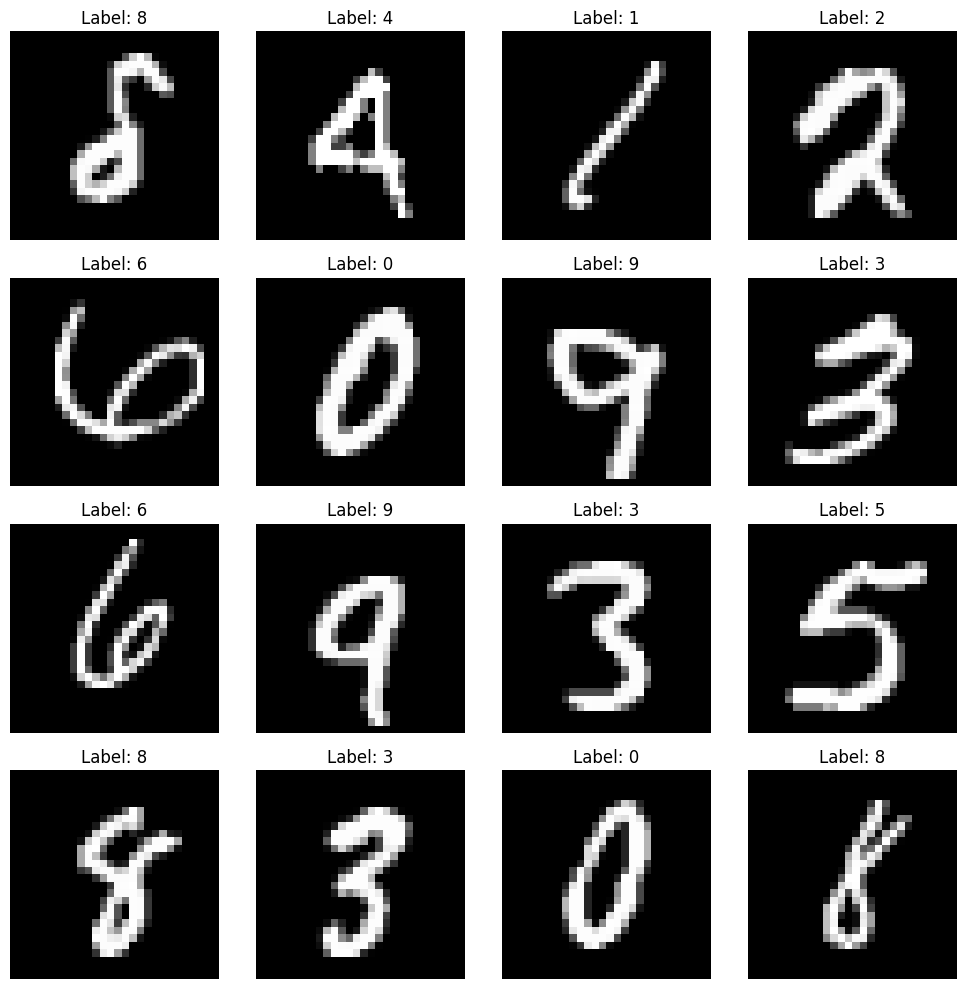

In [12]:

# Load MNIST dataset
# Definimos una secuencia de transformaciones para aplicar a las imágenes del dataset.
# En este caso, solo convertimos las imágenes a tensores utilizando `ToTensor()`.
# Esto es necesario para que las imágenes estén en un formato compatible con PyTorch.
transform = transforms.Compose([
    transforms.ToTensor()  # Convierte la imagen de un formato PIL o numpy.ndarray a un tensor.
])

# Cargamos el dataset MNIST de entrenamiento.
# `root='./data'` especifica el directorio donde se descargarán los datos si no están presentes.
# `train=True` indica que queremos el conjunto de datos de entrenamiento.
# `transform=transform` aplica las transformaciones definidas previamente a cada imagen.
# `download=True` descarga los datos si no están disponibles en el directorio especificado.
mnist_dataset = datasets.MNIST(
    root='./data', train=True, transform=transform, download=True
)

# Creamos un DataLoader que nos permite cargar los datos en lotes pequeños.
# `dataset=mnist_dataset` es el dataset que se cargará.
# `batch_size=16` indica que cada lote contendrá 16 imágenes y etiquetas.
# `shuffle=True` mezcla los datos aleatoriamente en cada época, mejorando la generalización del modelo.
data_loader = DataLoader(
    mnist_dataset, batch_size=16, shuffle=True
)

# Obtenemos un único lote de datos del DataLoader.
# `next(iter(data_loader))` convierte el DataLoader en un iterador y toma el primer lote.
# El lote contiene `images` (los tensores de las imágenes) y `labels` (las etiquetas correspondientes).
images, labels = next(iter(data_loader))


# Plot the images in a grid
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f'Label: {labels[i].item()}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Arquitectura

In [13]:

# Definimos el modelo MLP
# MLP hereda de nn.Module, lo que permite utilizar las funciones y propiedades de PyTorch
# para crear, entrenar y evaluar redes neuronales.
class MLP(nn.Module):
    def __init__(self):
        # Inicializamos la clase base nn.Module
        # Esto habilita funciones esenciales como la gestión de capas y forward pass.
        super(MLP, self).__init__()
        # Capa completamente conectada: de entrada (28x28 píxeles) a 512 neuronas
        self.fc1 = nn.Linear(28 * 28, 512)
        # Capa oculta: de 512 neuronas a 256 neuronas
        self.fc2 = nn.Linear(512, 256)
        # Capa de salida: de 256 neuronas a 10 clases (números del 0 al 9)
        self.fc3 = nn.Linear(256, 64)
        # Función de activación Sigmoid
        self.Sigmoid = nn.Sigmoid()
        # Dropout para evitar sobreajuste
        self.dropout = nn.Dropout(0.2)

    # Definimos cómo pasa la información a través de la red
    # Este método es obligatorio en las clases que heredan de nn.Module.
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Aplanamos las imágenes (de 28x28 a 1D)
        x = self.Sigmoid(self.fc1(x))  # Aplicamos la primera capa y ReLU
        x = self.dropout(x)         # Aplicamos Dropout
        x = self.Sigmoid(self.fc2(x))  # Aplicamos la segunda capa y ReLU
        x = self.dropout(x)         # Aplicamos Dropout
        x = self.fc3(x)             # Aplicamos la capa de salida
        return x

# Entrenamiento

In [14]:
# Hiperparámetros
batch_size = 128       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 20           # Número de épocas de entrenamiento

# Preprocesamiento y carga de datos de MNIST
transform = transforms.Compose([
    transforms.ToTensor(),                 # Convertimos imágenes a tensores
    transforms.Normalize((0.5,), (0.5,))  # Normalizamos a media 0 y varianza 1
])
train_dataset = datasets.MNIST(
    root='./data', train=True, transform=transform, download=True)  # Dataset de entrenamiento
test_dataset = datasets.MNIST(
    root='./data', train=False, transform=transform, download=True)  # Dataset de prueba
train_loader = DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True)  # Dataloader para entrenamiento
test_loader = DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False)  # Dataloader para prueba

# Definimos el modelo, la función de pérdida y el optimizador
model = MLP()                             # Creamos una instancia del modelo MLP
criterion = nn.CrossEntropyLoss()         # Función de pérdida para clasificación
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Optimizador Adam

# Bucle de entrenamiento
for epoch in range(epochs):
    model.train()  # Ponemos el modelo en modo entrenamiento
    for images, labels in train_loader:  # Iteramos sobre lotes de datos
        optimizer.zero_grad()            # Reiniciamos los gradientes
        outputs = model(images)          # Hacemos una predicción con el modelo
        loss = criterion(outputs, labels)  # Calculamos la pérdida
        loss.backward()                  # Propagamos los gradientes
        optimizer.step()                 # Actualizamos los pesos del modelo

    # Mostramos la pérdida al final de cada época
    print(f"Época [{epoch+1}/{epochs}], Pérdida: {loss.item():.4f}")



Época [1/20], Pérdida: 0.3277
Época [2/20], Pérdida: 0.2250
Época [3/20], Pérdida: 0.1406
Época [4/20], Pérdida: 0.1561
Época [5/20], Pérdida: 0.0892
Época [6/20], Pérdida: 0.0612
Época [7/20], Pérdida: 0.0650
Época [8/20], Pérdida: 0.0672
Época [9/20], Pérdida: 0.0316
Época [10/20], Pérdida: 0.0310
Época [11/20], Pérdida: 0.0306
Época [12/20], Pérdida: 0.0190
Época [13/20], Pérdida: 0.0514
Época [14/20], Pérdida: 0.0220
Época [15/20], Pérdida: 0.0662
Época [16/20], Pérdida: 0.0209
Época [17/20], Pérdida: 0.0868
Época [18/20], Pérdida: 0.0494
Época [19/20], Pérdida: 0.0442
Época [20/20], Pérdida: 0.0513


# Evaluación del modelo

In [15]:
model.eval()  # Ponemos el modelo en modo evaluación (desactiva Dropout)
correct = 0
total = 0
with torch.no_grad():  # Desactivamos el cálculo de gradientes para evaluación
    for images, labels in test_loader:  # Iteramos sobre los datos de prueba
        outputs = model(images)         # Hacemos predicciones
        _, predicted = torch.max(outputs.data, 1)  # Obtenemos la clase con mayor probabilidad
        total += labels.size(0)         # Total de muestras evaluadas
        correct += (predicted == labels).sum().item()  # Contamos las predicciones correctas

# Calculamos y mostramos la precisión del modelo
accuracy = 100 * correct / total
print(f"Accuracy en el conjunto de prueba: {accuracy:.2f}%")

Accuracy en el conjunto de prueba: 98.25%


Instrucción 2.1.1 Modificaciones de la arquitectura (10 ptos)
5 ptos El objetivo de esta secci´on de la actividad es evaluar diversas arquitecturas para el perceptr´on
multicapa y seleccionar el modelo que obtenga el mejor rendimiento en t´erminos de accuracy. Para
ello, se propone modificar los siguientes elementos: el n´umero de neuronas por capa, la cantidad
de capas ocultas y el tipo de funci´on de activaci´on utilizada.


# Hiperparámetros Prueba 1 RelU
batch_size = 64       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
        # Capa completamente conectada: de entrada (28x28 píxeles) a 512 neuronas
        self.fc1 = nn.Linear(28 * 28, 200)
        # Capa oculta: de 512 neuronas a 256 neuronas
        self.fc2 = nn.Linear(200, 256)
        # Capa de salida: de 256 neuronas a 10 clases (números del 0 al 9)
        self.fc3 = nn.Linear(256, 10)
        self.fc4 = nn.Linear(10, 10)
        # Función de activación ReLU
        self.relu = nn.ReLU()
        Accuracy en el conjunto de prueba: 97.73%

# Hiperparámetros Prueba 2 Tanh
batch_size = 64       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
        # Capa completamente conectada: de entrada (28x28 píxeles) a 512 neuronas
        self.fc1 = nn.Linear(28 * 28, 200)
        # Capa oculta: de 512 neuronas a 256 neuronas
        self.fc2 = nn.Linear(200, 256)
        # Capa de salida: de 256 neuronas a 10 clases (números del 0 al 9)
        self.fc3 = nn.Linear(256, 10)
        self.fc4 = nn.Linear(10, 10)
        # Función de activación Tanh
        self.Tanh = nn.Tanh()
        Accuracy en el conjunto de prueba: 97.08%

# Hiperparámetros Prueba 3 Sigmoid
batch_size = 64       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
        # Capa completamente conectada: de entrada (28x28 píxeles) a 512 neuronas
        self.fc1 = nn.Linear(28 * 28, 200)
        # Capa oculta: de 512 neuronas a 256 neuronas
        self.fc2 = nn.Linear(200, 256)
        # Capa de salida: de 256 neuronas a 10 clases (números del 0 al 9)
        self.fc3 = nn.Linear(256, 10)
        self.fc4 = nn.Linear(10, 10)
        # Función de activación Sigmoid
        self.reSigmoidlu = nn.Sigmoid()
        Accuracy en el conjunto de prueba: 97.50%

La función de activación con mayor accuracy es RelU, luego Sigmoid y por ultimo Tanh. 





Pruebas Modificando numero de neuronas por capas. Desde 512, 256, 128, 64 a 10.

# Hiperparámetros Prueba 4 Sigmoid
batch_size = 64       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
        # Capa completamente conectada: de entrada (28x28 píxeles) a 512 neuronas
        self.fc1 = nn.Linear(28 * 28, 512)
        # Capa oculta: de 512 neuronas a 256 neuronas
        self.fc2 = nn.Linear(512, 256)
        # Capa de salida: de 256 neuronas a 10 clases (números del 0 al 9)
        self.fc3 = nn.Linear(256, 10)
        self.fc4 = nn.Linear(10, 10)
        # Función de activación Sigmoid
        self.Sigmoid = nn.Sigmoid()
        Accuracy en el conjunto de prueba: 97.73%

# Hiperparámetros Prueba 5 Tanh
batch_size = 64       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
        # Capa completamente conectada: de entrada (28x28 píxeles) a 512 neuronas
        self.fc1 = nn.Linear(28 * 28, 512)
        # Capa oculta: de 512 neuronas a 256 neuronas
        self.fc2 = nn.Linear(512, 256)
        # Capa de salida: de 256 neuronas a 10 clases (números del 0 al 9)
        self.fc3 = nn.Linear(256, 10)
        self.fc4 = nn.Linear(10, 10)
        # Función de activación Tanh
        self.Tanh = nn.Tanh()
        Accuracy en el conjunto de prueba: 96.49%

# Hiperparámetros Prueba 6 RelU
batch_size = 64       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
        # Capa completamente conectada: de entrada (28x28 píxeles) a 512 neuronas
        self.fc1 = nn.Linear(28 * 28, 512)
        # Capa oculta: de 512 neuronas a 256 neuronas
        self.fc2 = nn.Linear(512, 256)
        # Capa de salida: de 256 neuronas a 10 clases (números del 0 al 9)
        self.fc3 = nn.Linear(256, 10)
        self.fc4 = nn.Linear(10, 10)
        # Función de activación RelU
        self.RelU = nn.RelU()
        Accuracy en el conjunto de prueba: 97.70%

Al aumentar las neuronas por capas el activador que mejor rendimiento tiene es sigmoid subiendo un 0.23%, en cambio Tanh tiene una perdida de 0.59% y RelU de un 0.3% menos lo que nos indica que sigmoid reacciona mejor a mayor cantidad de neuronas por capa.

Pruebas Modificando numero de capas a 3 y neuronas desde 512, 256, 128 a 64.


# Hiperparámetros Prueba 7 RelU
batch_size = 64       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
        # Capa completamente conectada: de entrada (28x28 píxeles) a 512 neuronas
        self.fc1 = nn.Linear(28 * 28, 200)
        # Capa oculta: de 512 neuronas a 256 neuronas
        self.fc2 = nn.Linear(200, 256)
        # Capa de salida: de 256 neuronas a 10 clases (números del 0 al 9)
        self.fc3 = nn.Linear(256, 64)
        # Función de activación RelU
        self.RelU = nn.RelU()
        Accuracy en el conjunto de prueba: 97.62%

# Hiperparámetros Prueba 8 Tanh
batch_size = 64       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
        # Capa completamente conectada: de entrada (28x28 píxeles) a 512 neuronas
        self.fc1 = nn.Linear(28 * 28, 200)
        # Capa oculta: de 512 neuronas a 256 neuronas
        self.fc2 = nn.Linear(200, 256)
        # Capa de salida: de 256 neuronas a 10 clases (números del 0 al 9)
        self.fc3 = nn.Linear(256, 64)
        # Función de activación Tanh
        self.Tanh = nn.Tanh()
        Accuracy en el conjunto de prueba: 96.67%

# Hiperparámetros Prueba 9 Sigmoid
batch_size = 64       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
        # Capa completamente conectada: de entrada (28x28 píxeles) a 512 neuronas
        self.fc1 = nn.Linear(28 * 28, 200)
        # Capa oculta: de 512 neuronas a 256 neuronas
        self.fc2 = nn.Linear(200, 256)
        # Capa de salida: de 256 neuronas a 10 clases (números del 0 al 9)
        self.fc3 = nn.Linear(256, 64)
        # Función de activación Sigmoid
        self.Sigmoid = nn.Sigmoid()
        Accuracy en el conjunto de prueba: 97.79%

Al disminuir las capas eliminando la n°4 el actividor sigmoid alcanza su nivel de accuracy más alto que en los otros modelos de prueba ejecutados entre los 3 tipos de activadores empleados, siendo este el modelo más confiable para seleccionar o recomendar.

2.1.2 Modificaciones del entrenamiento (10 ptos)
5 ptos El objetivo de esta secci´on de la actividad es evaluar distintas estrategias de entrenamiento y seleccionar la mejor alternativa en funci´on de su accuracy. Para ello, se propone modificar los siguientes aspectos: el algoritmo de optimización, la tasa de aprendizaje (learning rate), el tamaño
del lote (batch size) y el número de épocas.

# Hiperparámetros Prueba 9 Sigmoid con batch_size = 64
batch_size = 64       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
Accuracy en el conjunto de prueba: 97.79%
# Hiperparámetros Prueba 10 Sigmoid con batch_size = 128
batch_size = 128       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
Accuracy en el conjunto de prueba: 97.82%
# Hiperparámetros Prueba 11 Sigmoid con batch_size = 256
batch_size = 256       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
Accuracy en el conjunto de prueba: 97.66%

# Hiperparámetros Prueba 12 Sigmoid con learning_rate = 0.001
batch_size = 128       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
Accuracy en el conjunto de prueba: 97.82%
# Hiperparámetros Prueba 12 Sigmoid con learning_rate = 0.002
batch_size = 128       # Tamaño de lote
learning_rate = 0.003 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
Accuracy en el conjunto de prueba: 97.31%
# Hiperparámetros Prueba 13 Sigmoid con learning_rate = 0.003
batch_size = 128       # Tamaño de lote
learning_rate = 0.003 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
Accuracy en el conjunto de prueba: 96.65%

# Hiperparámetros Prueba 14 Sigmoid con epochs = 10
batch_size = 128       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
Accuracy en el conjunto de prueba:97.82%
# Hiperparámetros Prueba 15 Sigmoid con epochs = 15
batch_size = 128       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
Accuracy en el conjunto de prueba:97.99%
# Hiperparámetros Prueba 15 Sigmoid con epochs = 20
batch_size = 128       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
Accuracy en el conjunto de prueba:98.12%

Trabajando con la función de activación sigmoid pero modificando parametros como Batch, learning rate y epochs el modelo que logro el mayor accuraccy fue la prueb N° 15 que logro obtener un mejor desempeño al seleccionar la prueba 10 con un batch de 128, la prueba 12 con un learning rate de 0.001 y la prueba 15 con 20 epochs.  

In [54]:
# Verificar si hay una GPU disponible, de lo contrario usar la CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Preprocesamiento: Definir transformaciones para los datos
transform = transforms.Compose([
    transforms.ToTensor(),                # Convertir imágenes a tensores
    transforms.Normalize((0.5,), (0.5,))  # Normalizar los valores a un rango de [-1, 1]
])

# Cargar el conjunto de datos MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)  # Datos de entrenamiento
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)  # Datos de prueba

# Crear DataLoaders para manejar los datos de forma eficiente 
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)   # Loader para entrenamiento (batch de 128, mezclado)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)    # Loader para prueba (batch de 128, sin mezclar)

class CNN(nn.Module):
    def __init__(self, verbose=False, filters_l1=8, filters_l2=32, dropout=0.2, final_layer_size=128):
        super(CNN, self).__init__()
        self.verbose = verbose
        self.filters_l1 = filters_l1
        self.filters_l2 = filters_l2
        self.dropout_rate = dropout
        self.final_layer_size = final_layer_size

        # Primera capa convolucional
        self.conv1 = nn.Conv2d(1, self.filters_l1, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Segunda capa convolucional
        self.conv2 = nn.Conv2d(self.filters_l1, self.filters_l2, kernel_size=3, stride=1, padding=1)

        # Calcular automáticamente las dimensiones de la capa lineal (fc1)
        self.fc1_input_size = self._calculate_fc1_input_size()
        
        # Primera capa completamente conectada
        self.fc1 = nn.Linear(self.fc1_input_size, self.final_layer_size)

        # Capa adicional completamente conectada
        self.fc2_additional = nn.Linear(self.final_layer_size, self.final_layer_size // 4) 

        self.dropout = nn.Dropout(self.dropout_rate)
        self.fc2 = nn.Linear(self.final_layer_size // 4, 10)  # Capa de salida para 10 clases (MNIST)

    def _calculate_fc1_input_size(self):
        """
        Calcula automáticamente el tamaño de la entrada para la primera capa completamente conectada (fc1).
        Simula una pasada con una imagen de prueba de tamaño (1, 28, 28).
        """
        with torch.no_grad():  # Desactiva gradientes
            x = torch.randn(1, 1, 28, 28)  # Tensor ficticio de entrada con tamaño MNIST (batch_size=1)
            x = self.pool(torch.relu(self.conv1(x)))  # Aplicar Conv1 -> Pool
            x = self.pool(torch.relu(self.conv2(x)))  # Aplicar Conv2 -> Pool
            fc1_input_size = x.numel()  # Calcular número total de elementos
        return fc1_input_size

    def forward(self, x):
        if self.verbose: 
            print(f"Entrada: {x.shape}")  # Imprime la dimensión de la entrada

        # Primera capa convolucional, ReLU y MaxPooling
        x = self.pool(torch.relu(self.conv1(x)))
        if self.verbose:
            print(f"Después de Conv1 y MaxPooling: {x.shape}")  # Dimensión después de Conv1 y Pool

        # Segunda capa convolucional, ReLU y MaxPooling
        x = self.pool(torch.relu(self.conv2(x)))
        if self.verbose:
            print(f"Después de Conv2 y MaxPooling: {x.shape}")  # Dimensión después de Conv2 y Pool

        # Aplanar las características 2D a 1D
        x = x.view(-1, self.fc1_input_size)
        if self.verbose:
            print(f"Después de Aplanamiento: {x.shape}")  # Dimensión después de Flatten

        # Primera capa completamente conectada
        x = torch.relu(self.fc1(x))
        if self.verbose:
            print(f"Después de Fully Connected (fc1): {x.shape}")  # Dimensión después de fc1

        # Aplicar Dropout
        x = self.dropout(x)
        if self.verbose:
            print(f"Después de Dropout: {x.shape}")  # Dimensión después de Dropout

        # Capa adicional completamente conectada
        x = torch.relu(self.fc2_additional(x))  # Modificado
        if self.verbose:
            print(f"Después de Fully Connected (fc2_additional): {x.shape}")  # Modificado

        # Aplicar Dropout
        x = self.dropout(x)  # Modificado

        # Capa de salida
        x = self.fc2(x)
        if self.verbose:
            print(f"Después de Fully Connected (fc2): {x.shape}")  # Dimensión después de fc2 (salida final)

        return x



In [55]:
# Inicializar el modelo, la función de pérdida y el optimizador ##### modificar filtros l1,l2, dropout, final layer size
model = CNN(verbose=False, filters_l1=8, filters_l2=32, dropout=0.2, final_layer_size=128).to(device)                             # Mover el modelo a la GPU/CPU
criterion = nn.CrossEntropyLoss()                    # Función de pérdida para clasificación multiclase
optimizer = optim.RMSprop(model.parameters(), lr=0.01) # Optimizador Adam con tasa de aprendizaje 0.001 ##modificar leerning rate ###modificar optimizador adam / adagrad

# Definir la función de entrenamiento
def train(model, loader, criterion, optimizer, device):
    model.train()  # Establecer el modelo en modo de entrenamiento
    running_loss = 0.0
    for images, labels in loader:  # Iterar sobre los lotes de datos
        images, labels = images.to(device), labels.to(device)  # Mover los datos a la GPU/CPU

        optimizer.zero_grad()       # Reiniciar los gradientes
        outputs = model(images)     # Paso hacia adelante
        loss = criterion(outputs, labels)  # Calcular la pérdida
        loss.backward()             # Paso hacia atrás (cálculo de gradientes)
        optimizer.step()            # Actualizar los pesos

        running_loss += loss.item()  # Acumular la pérdida
    return running_loss / len(loader)  # Devolver la pérdida promedio

# Definir la función de evaluación
def evaluate(model, loader, device):
    model.eval()  # Establecer el modelo en modo de evaluación
    correct = 0
    total = 0
    with torch.no_grad():  # Deshabilitar el cálculo de gradientes para ahorrar memoria
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)  # Mover datos a la GPU/CPU
            outputs = model(images)  # Paso hacia adelante
            _, predicted = torch.max(outputs, 1)  # Obtener las predicciones (clase con mayor probabilidad)
            total += labels.size(0)  # Contar el número total de ejemplos
            correct += (predicted == labels).sum().item()  # Contar las predicciones correctas
    return correct / total  # Calcular la precisión

# Bucle principal de entrenamiento
num_epochs = 10  # Número de épocas
for epoch in range(num_epochs):
    # Entrenar el modelo y calcular la pérdida
    train_loss = train(model, train_loader, criterion, optimizer, device)
    # Evaluar el modelo en el conjunto de prueba
    test_accuracy = evaluate(model, test_loader, device)
    # Imprimir los resultados de la época actual
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Calcular la precisión final en el conjunto de prueba
final_accuracy = evaluate(model, test_loader, device)
print(f"Final Test Accuracy: {final_accuracy:.4f}")


Epoch [1/10], Loss: 1.2955, Test Accuracy: 0.9296
Epoch [2/10], Loss: 0.3285, Test Accuracy: 0.9541
Epoch [3/10], Loss: 0.2377, Test Accuracy: 0.9663
Epoch [4/10], Loss: 0.2051, Test Accuracy: 0.9642
Epoch [5/10], Loss: 0.1846, Test Accuracy: 0.9755
Epoch [6/10], Loss: 0.1493, Test Accuracy: 0.9726
Epoch [7/10], Loss: 0.1301, Test Accuracy: 0.9776
Epoch [8/10], Loss: 0.1179, Test Accuracy: 0.9787
Epoch [9/10], Loss: 0.1108, Test Accuracy: 0.9812
Epoch [10/10], Loss: 0.1029, Test Accuracy: 0.9829
Final Test Accuracy: 0.9829


2.2 Redes convolucionales
2.2.1 Modificaciones de la arquitectura (15 ptos)
10 ptos El objetivo de esta sección de la actividad es evaluar diversas arquitecturas para el perceptrón multicapa y seleccionar el modelo que obtenga el mejor rendimiento en 
términos de accuracy. Para ello, se propone modificar los siguientes elementos: el número de filtros, el número de neuronas en la capa posterior a las capas convolucionales, agregando mas capas lineales y el parametro asociado a dropout 

# Prueba 1. Modificando filtros
model = CNN(verbose=False, filters_l1=8, filters_l2=32, dropout=0.2, final_layer_size=128).to(device)                             # Mover el modelo a la GPU/CPU
criterion = nn.CrossEntropyLoss()                    # Función de pérdida para clasificación multiclase
optimizer = optim.Adam(model.parameters(), lr=0.001)
Final Test Accuracy: 0.9904
Tiempo de ejecucióm: 4m 47.8s

# Prueba 2. Modificando filtros
model = CNN(verbose=False, filters_l1=32, filters_l2=64, dropout=0.2, final_layer_size=128).to(device)                             # Mover el modelo a la GPU/CPU
criterion = nn.CrossEntropyLoss()                    # Función de pérdida para clasificación multiclase
optimizer = optim.Adam(model.parameters(), lr=0.001)
Final Test Accuracy: 0.9910
Tiempo de ejecucióm: 9m 20s

# Prueba 3. Modificando filtros
model = CNN(verbose=False, filters_l1=64, filters_l2=128, dropout=0.2, final_layer_size=128).to(device)                             # Mover el modelo a la GPU/CPU
criterion = nn.CrossEntropyLoss()                    # Función de pérdida para clasificación multiclase
optimizer = optim.Adam(model.parameters(), lr=0.001)
Final Test Accuracy: 0.9913
Tiempo de ejecucióm: 35m 11s

# No se observa una precisión mayor que logre justificar trabajar el modelo con un mayor numero de filtros, ya que el tiempo de ejecucción no amerita el accuracy obtenido. De este modo observe que trabajar con un filtro entre 8,32 en 4 minutos 47 segundos es más efectivo que un numero de filtros entre 64,128 en 35 minutos 11 segundos.

# Prueba 4. Agregando 1 capa adicional 
self.fc2_additional = nn.Linear(self.final_layer_size, self.final_layer_size // 2) 

self.dropout = nn.Dropout(self.dropout_rate)
self.fc2 = nn.Linear(self.final_layer_size // 2, 10)
Final Test Accuracy: 0.9916
Tiempo de ejecucióm: 5m 28s
# la modificación agregando una capa adicional con 32 y 64 filtros logra un accuracy mayor a la prueba 3 realizada con 64 y 128 filtros en 35minutos pero en un tiempo 6 veces menor (5m 28s). 

# Prueba 5. Modificando dropout= 0.1
Final Test Accuracy: 0.9910
Tiempo de ejecucióm: 5m 26s

# Prueba 6. Modificando dropout= 0.2
Final Test Accuracy: 0.9916
Tiempo de ejecucióm: 5m 28s

# Prueba 7. Modificando dropout= 0.3
Final Test Accuracy: 0.9905
Tiempo de ejecucióm: 4m 48s

# Prueba 8. Modificando dropout= 0.4
Final Test Accuracy: 0.9907
Tiempo de ejecucióm: 5m 23s

# Documente los resultados obtenidos, seleccione una arquitecture y entregue sus conclusiones
# La arquitectura que mejor rendimiento de accuracy generado fue con 8 y 32 filtros, añadiendo 1 capa adicional y un dropout 0.2. Esta es la arquitectura tambien con mejor tiempo de ejecución. 

2.2.2 Modificaciones del entrenamiento
10 ptos Al igual que la experimentaci on realizada con el perceptrÓn multicapa, compare diferentes algoritmos de optimización para el entrenamiento y evalue el comporramiento del entrenamiento para diferentes valores del learning rate.

# Prueba 9. Optimizador Adam Learning Rate 0.001
optimizer = optim.Adam(model.parameters(), lr=0.001)
Final Test Accuracy: 0.9916
Tiempo de ejecucióm: 5m 28s

# Prueba 10. Optimizador Adam Learning Rate 0.01
optimizer = optim.Adam(model.parameters(), lr=0.01)
Final Test Accuracy: 0.9852
Tiempo de ejecucióm: 5m 22s

# Prueba 11. Optimizador Adam Learning Rate 0.002
optimizer = optim.Adam(model.parameters(), lr=0.002)
Final Test Accuracy: 0.9889
Tiempo de ejecucióm: 5m 31s

# Prueba 12. Optimizador Adam Learning Rate 0.0001
optimizer = optim.Adam(model.parameters(), lr=0.0001)
Final Test Accuracy: 0.9782
Tiempo de ejecucióm: 5m 37s

# Prueba 13. Optimizador Adagrad Learning Rate 0.0001
optimizer = optim.Adagrad(model.parameters(), lr=0.0001)
Final Test Accuracy: 0.9390
Tiempo de ejecucióm: 5m 20s

# Prueba 14. Optimizador Adamax Learning Rate 0.0001
optimizer = optim.Adamax(model.parameters(), lr=0.0001)
Final Test Accuracy: 0.9862
Tiempo de ejecucióm: 5m 53s

# Prueba 15. Optimizador SGD Learning Rate 0.0001
optimizer = optim.SGD(model.parameters(), lr=0.0001) 
Final Test Accuracy: 0.5157
Tiempo de ejecucióm: 6m 09s

# Prueba 16. Optimizador RMSprop Learning Rate 0.0001
optimizer = optim.RMSprop(model.parameters(), lr=0.0001) 
Final Test Accuracy: 0.9915
Tiempo de ejecucióm: 5m 35s

# Prueba 17. Optimizador AdamW Learning Rate 0.0001
optimizer = optim.AdamW(model.parameters(), lr=0.0001) 
Final Test Accuracy: 0.9892
Tiempo de ejecucióm: 5m 31s

# Prueba 18. Optimizador NAdam Learning Rate 0.0001
optimizer = optim.NAdam(model.parameters(), lr=0.0001) 
Final Test Accuracy: 0.9901
Tiempo de ejecucióm: 6m 16s

# Prueba 19. Optimizador RMSprop Learning Rate 0.0001 filtros 32 y 64
optimizer = optim.RMSprop(model.parameters(), lr=0.0001) 
Final Test Accuracy: 0.9931
Tiempo de ejecucióm: 15m 36s

# Prueba 20. Optimizador Adam Learning Rate 0.0001 filtros 32 y 64
optimizer = optim.Adam(model.parameters(), lr=0.0001) 
Final Test Accuracy: 0.9917
Tiempo de ejecucióm: 13m 4s

# 2.3 ComparaciÓn // Concluya comparando el rendimiento, el numero de parametros y tiempo de ejecución de cada una de las arquitecturas
Se realizaron pruebas con los optimizadores Adam, Adagrad, Adamax, SGD, RMSprop, AdamW y NAdam, de las cuales las que mostraron mayor y similares accuracy fueron Adam y RMSprop. Pero estos al ser sometidos a filtros de mayores el optimizador Adam no logra generar un accuracy mayor al tiempo de ejecución de casi 8 minutos más en cambio RMSprop paso de un accuracy 0.9915 en 5m 35s a un accuracy 0.9931 15m 36s, esta limitación generada en mi computador podria subsanarse con un equipo de mayor capacidad, siendo este un detalle no menor al momento de escoger un buen optimizador para un proyecto. 
